# Optimisers

This notebook gives a demonstration of some commonly known optimisation functions for neural networks.
It optimises a very simple function (could be changed to an arbitrarily complex function) and showcases some common pitfalls of the optimisers.

First some imports we will use:

In [1]:
%matplotlib notebook

from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from importlib import reload

Next we set up some helper functions for the plot:

In [2]:
def plot_point(x):
    point.set_xdata([x])
    point.set_ydata([func(x)])

    return point


def plot_update(i):
    global v
    label = "Step %i" % i
    x = point.get_xdata()[0]

    dx = lambda x: 2 * x

    x = update(x, dx)

    plot_point(x)

    return point, ax

def plot_optimisation(func, init_x):
    fig, ax = plt.subplots()
    fig.set_tight_layout(True)

    func_x = np.linspace(-10, 10, 1000)
    func_y = [func(_x) for _x in func_x]

    ax.plot(func_x, func_y)

    point, = ax.plot(init_x, func(init_x), marker="o", markersize=10)

    print('fig size: {0} DPI, size in inches {1}'.format(
        fig.get_dpi(), fig.get_size_inches()))
    anim = FuncAnimation(fig, plot_update, frames=range(10000), interval=200, repeat=False)
    
    return anim
    #anim.save("%s.html" % update.__name__, dpi=80, writer="imagemagick")

Now we define the function that will be optimised. For example, we use a simple $x^2$ function. We represent the plot by 1000 points evenly spaced between $x=-10$ and $x=10$.

In [3]:
def func(x):
    return x**2


Define the update steps for different optimisation functions:

In [4]:
def sgd_update(x, dx):
    x -= learning_rate * dx(x)
    return x


def momentum_update(x, dx):
    global v
    v = mu * v - learning_rate * dx(x)
    x += v
    return x


def nesterov_momentum_update(x, dx):
    global v

    x_ahead = x + mu * v

    v = mu * v - learning_rate * dx(x_ahead)
    x += v
    return x


def adagrad_update(x, dx):
    global v, cache, eps

    cache += dx(x) ** 2
    x += -learning_rate * dx(x) / (np.sqrt(cache) + eps)

    return x


def rmsprop_update(x, dx):
    global cache, decay_rate

    cache = decay_rate * cache + (1 - decay_rate) * dx(x) ** 2
    x += -learning_rate * dx(x) / (np.sqrt(cache) + eps)

    return x


def simple_adam_update(x, dx):
    global beta1, beta2, m, v

    m = beta1 * m + (1 - beta1) * dx(x)
    v = beta2 * v + (1 - beta2) * (dx(x) ** 2)

    x += -learning_rate * m / (np.sqrt(v) + eps)

    return x


def adam_update(x, dx):
    global beta1, beta2, m, v, t

    m = beta1 * m + (1 - beta1) * dx(x)
    mt = m / (1 - beta1 ** t)

    v = beta2 * v + (1 - beta2) * (dx(x) ** 2)
    vt = v / (1 - beta2 ** t)

    x += -learning_rate * mt / (np.sqrt(vt) + eps)

    return x


def radam_update(x, dx):
    global beta1, beta2, m, v, t, p, i

    i += 1

    m = beta1 * m + (1 - beta1) * dx(x)
    mt = m / (1 - beta1 ** t)

    v = beta2 * v + (1 - beta2) * (dx(x) ** 2)

    pt = p - 2 * i * beta2 / (1 - beta2)

    if pt > 4:
        vt = np.sqrt(v / (1 - beta2 ** t)) + eps
        rt = np.sqrt((pt - 4) * (pt - 2) * p / ((p - 4) * (p - 2) * pt))
        x += -learning_rate * rt * mt / vt
    else:
        x += -learning_rate * mt

    return x


# Examples

Here, some examples of optimisers with good or bad hyperparameter settings are shown.

## Stochastic Gradient Descent

### Good Learning Rate
First an example of Stochastic Gradient Descent with a "good" learning rate:

<IPython.core.display.Javascript object>


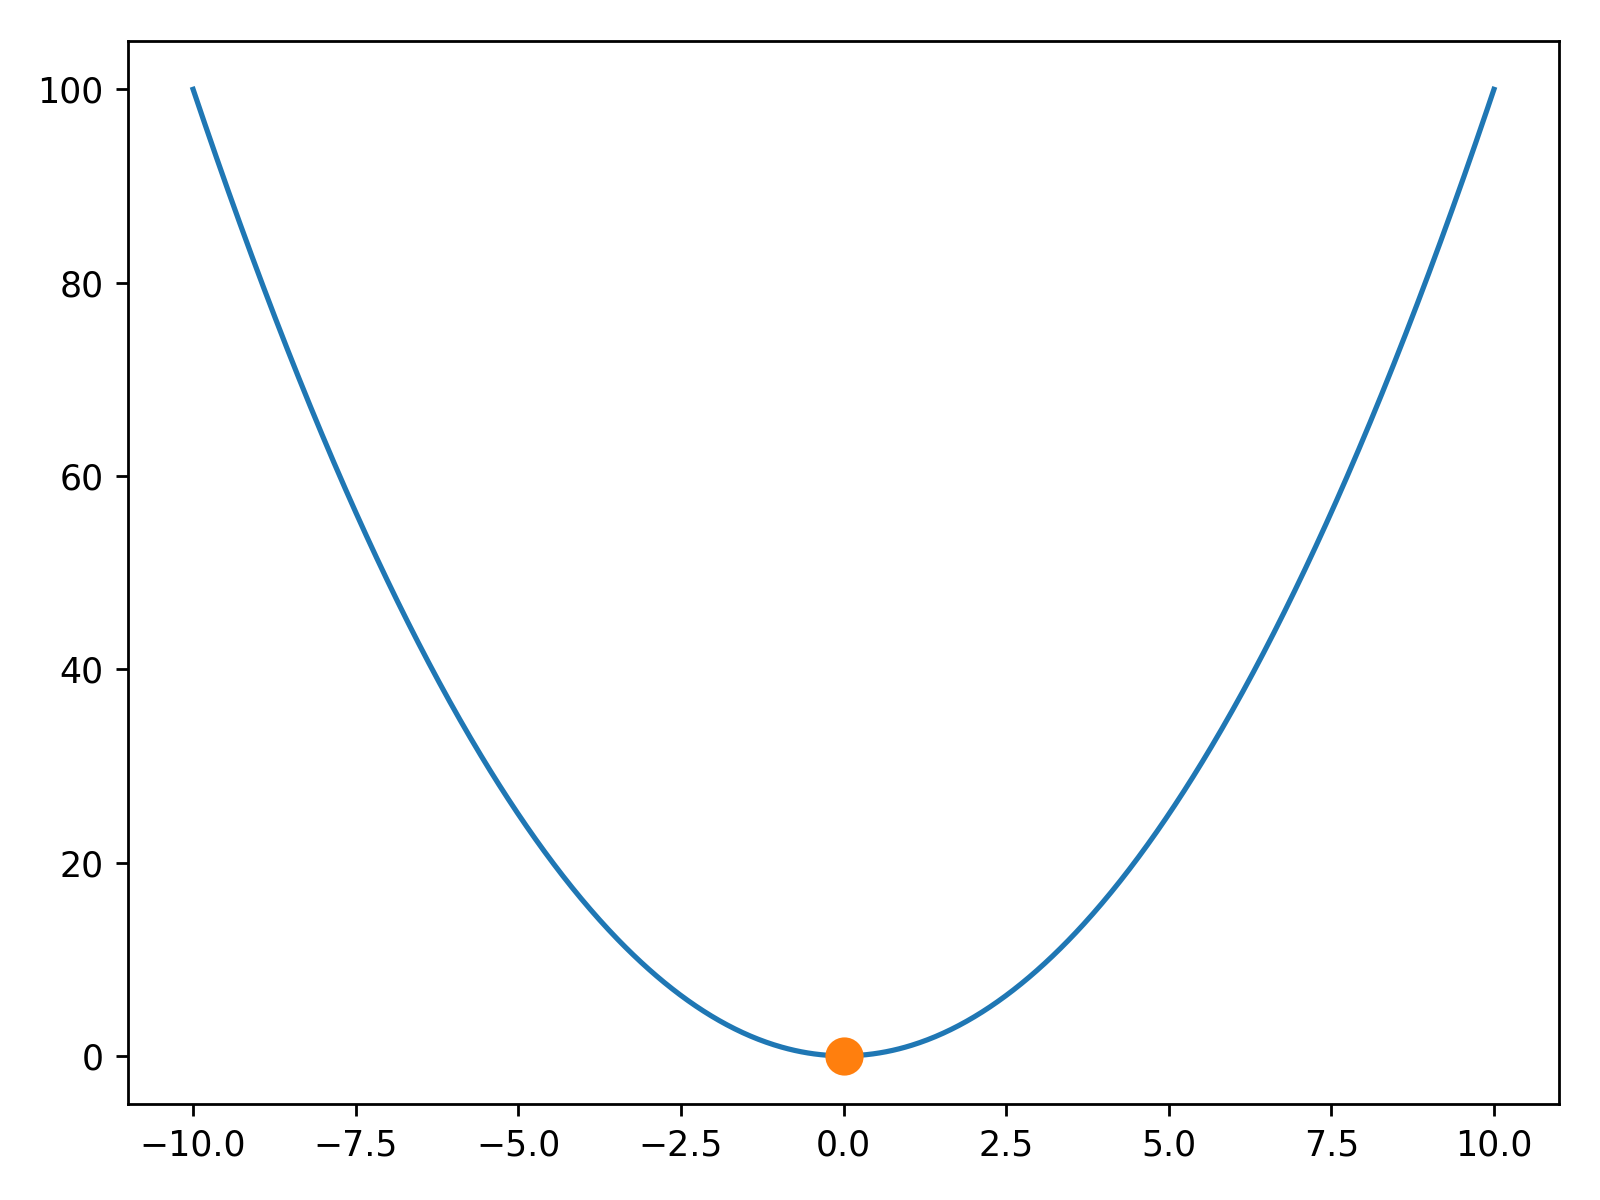

fig size: 100.0 DPI, size in inches [6.4 4.8]


In [5]:
update = sgd_update
learning_rate = 0.1

init_x = 7

fig, ax = plt.subplots()
fig.set_tight_layout(True)

func_x = np.linspace(-10, 10, 1000)
func_y = [func(_x) for _x in func_x]

ax.plot(func_x, func_y)

point, = ax.plot(init_x, func(init_x), marker="o", markersize=10)

print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))
anim = FuncAnimation(fig, plot_update, frames=range(10000), interval=50, repeat=False)

plt.show()

### Low learning rate

Now a low learning rate:

<IPython.core.display.Javascript object>


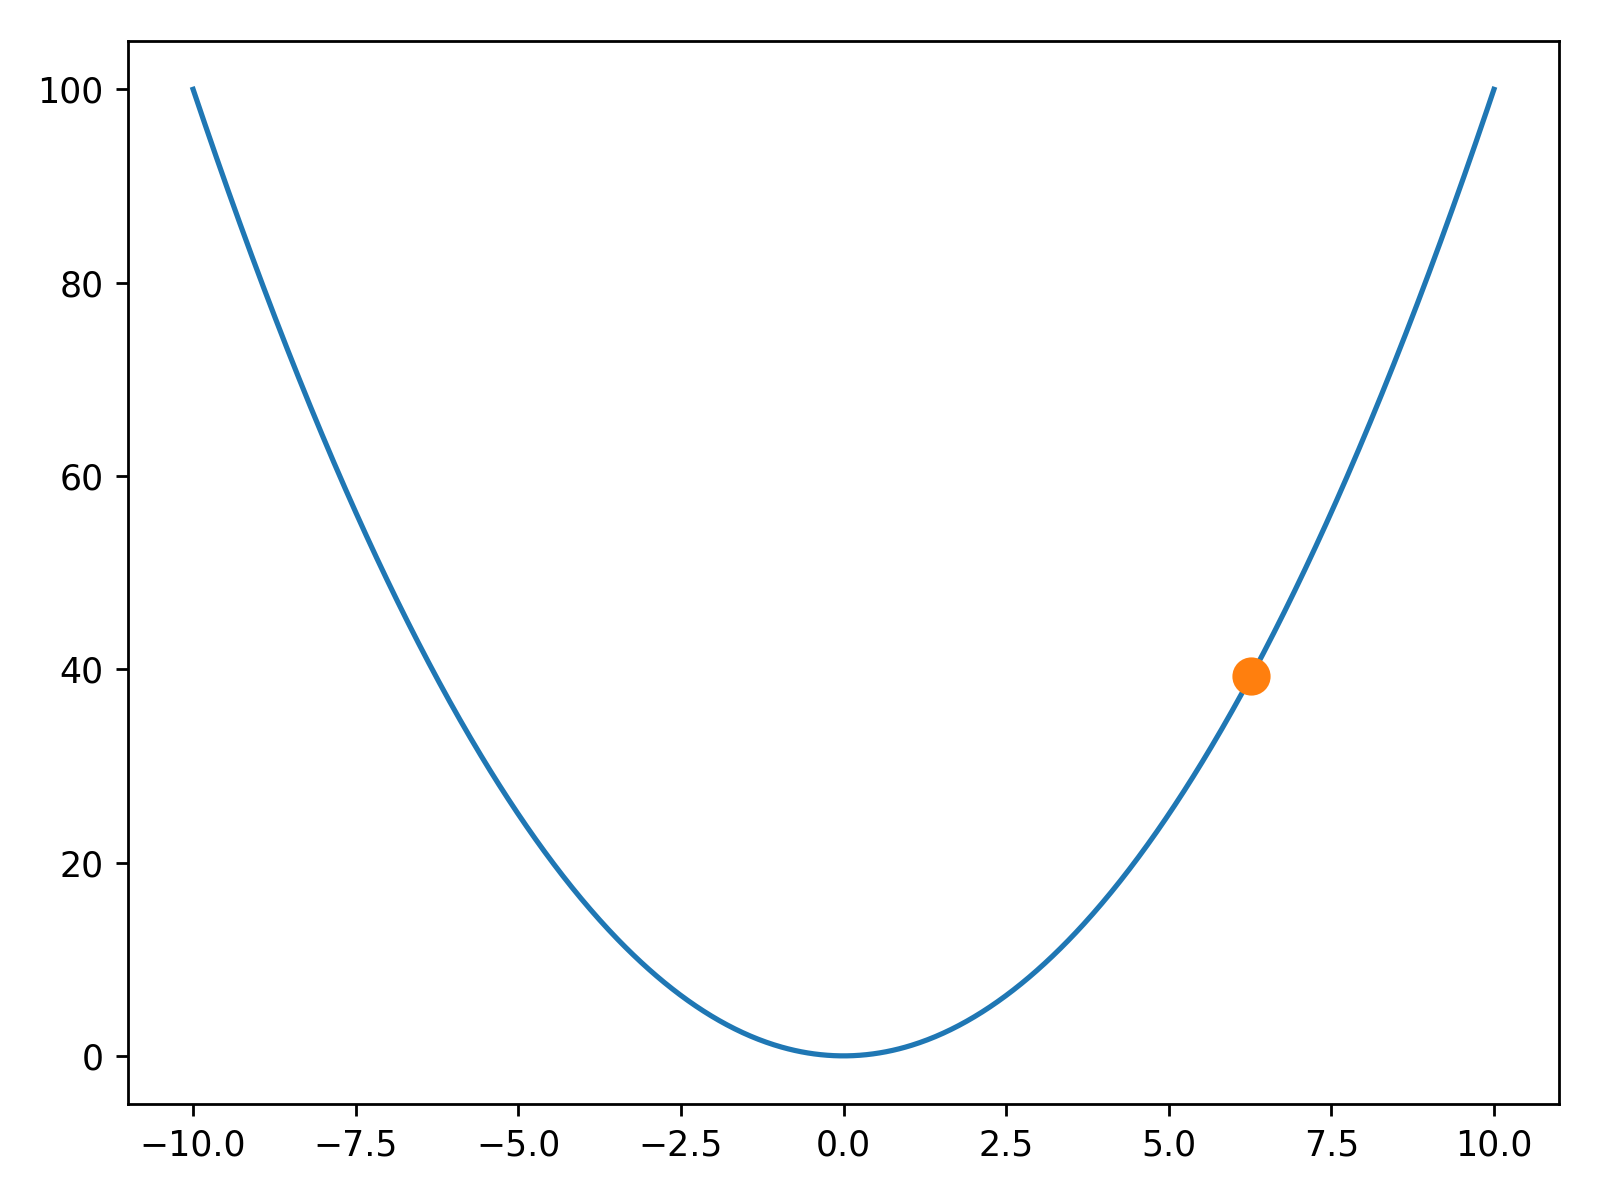

fig size: 100.0 DPI, size in inches [6.4 4.8]


In [6]:
update = sgd_update
learning_rate = 0.001

init_x = 7

plt.close()
reload(plt)
fig, ax = plt.subplots()
fig.set_tight_layout(True)

func_x = np.linspace(-10, 10, 1000)
func_y = [func(_x) for _x in func_x]

ax.plot(func_x, func_y)

point, = ax.plot(init_x, func(init_x), marker="o", markersize=10)

print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))
anim2 = FuncAnimation(fig, plot_update, frames=range(10000), interval=50, repeat=False)

plt.show()

### High Learning Rate

And a high learning rate:

<IPython.core.display.Javascript object>


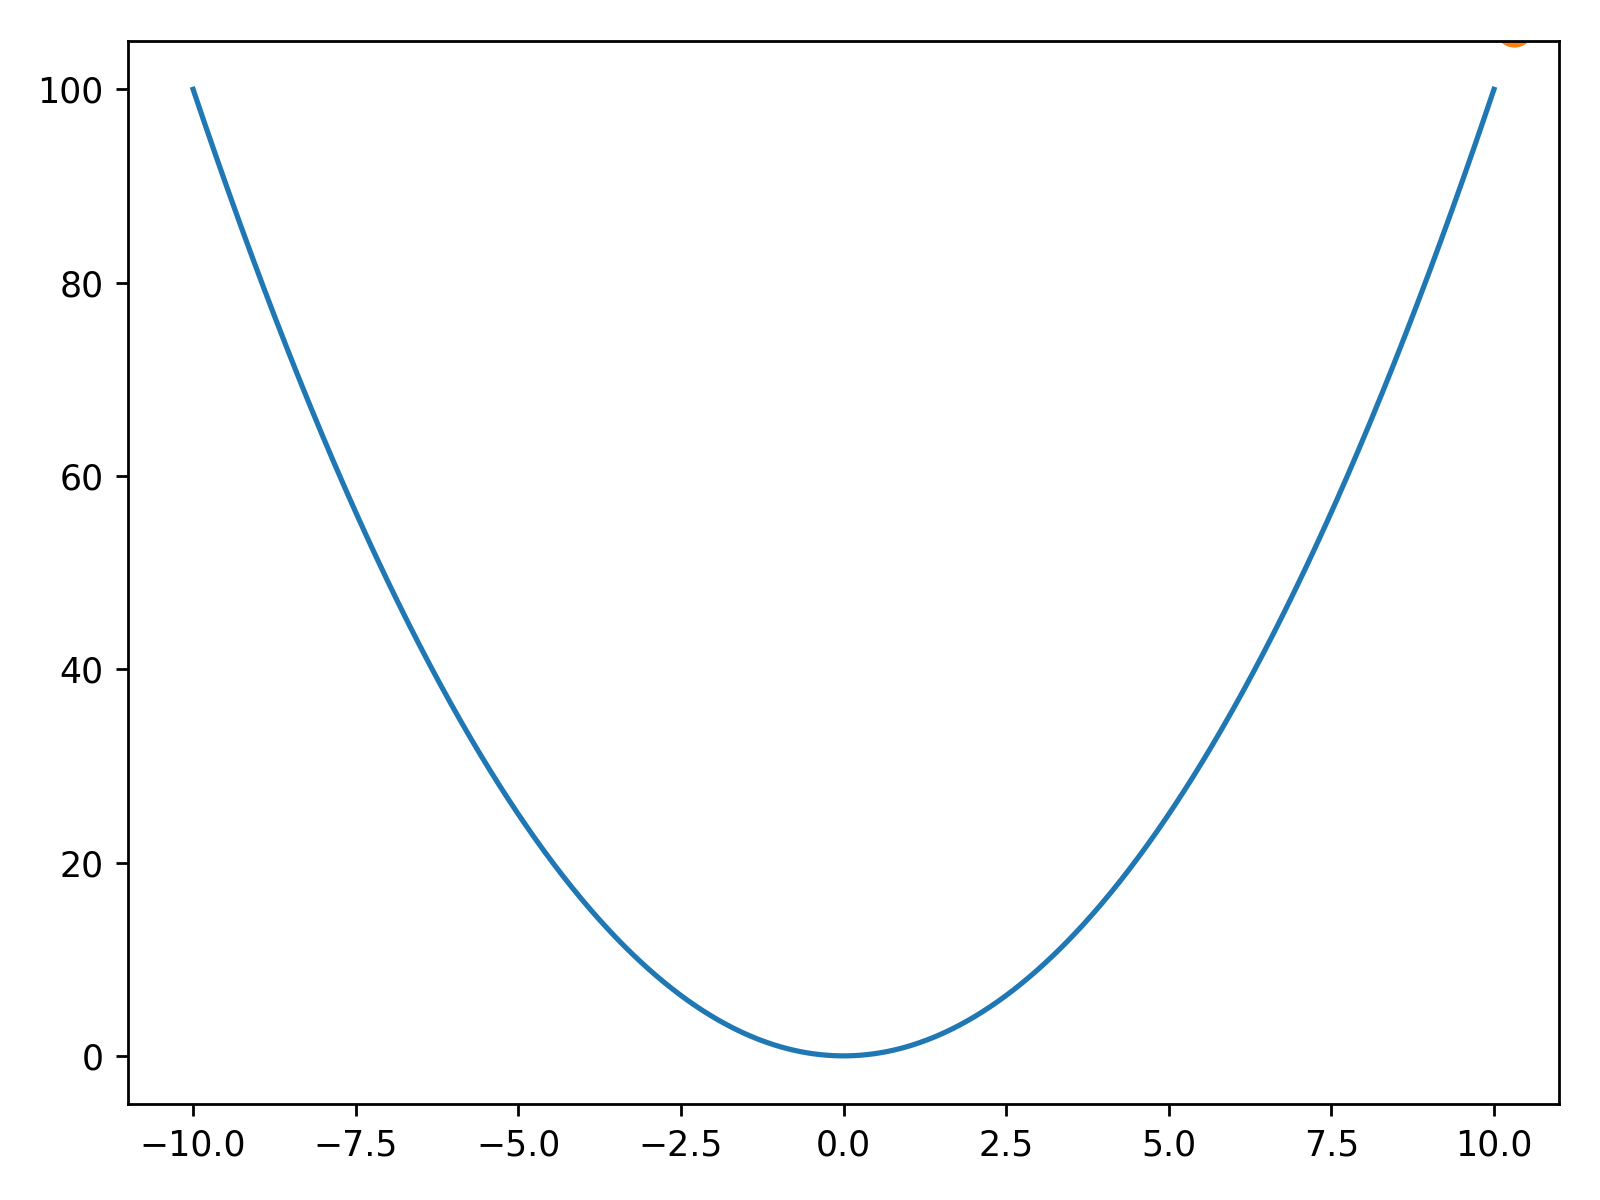

fig size: 100.0 DPI, size in inches [6.4 4.8]


In [7]:
update = sgd_update
learning_rate = 1.001

init_x = 7

plt.close()
reload(plt)
fig, ax = plt.subplots()
fig.set_tight_layout(True)

func_x = np.linspace(-10, 10, 1000)
func_y = [func(_x) for _x in func_x]

ax.plot(func_x, func_y)

point, = ax.plot(init_x, func(init_x), marker="o", markersize=10)

print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))
anim2 = FuncAnimation(fig, plot_update, frames=range(10000), interval=50, repeat=False)

plt.show()

## Momentum

### High momentum
With high momentum, the optimiser runs over the minimum:

<IPython.core.display.Javascript object>


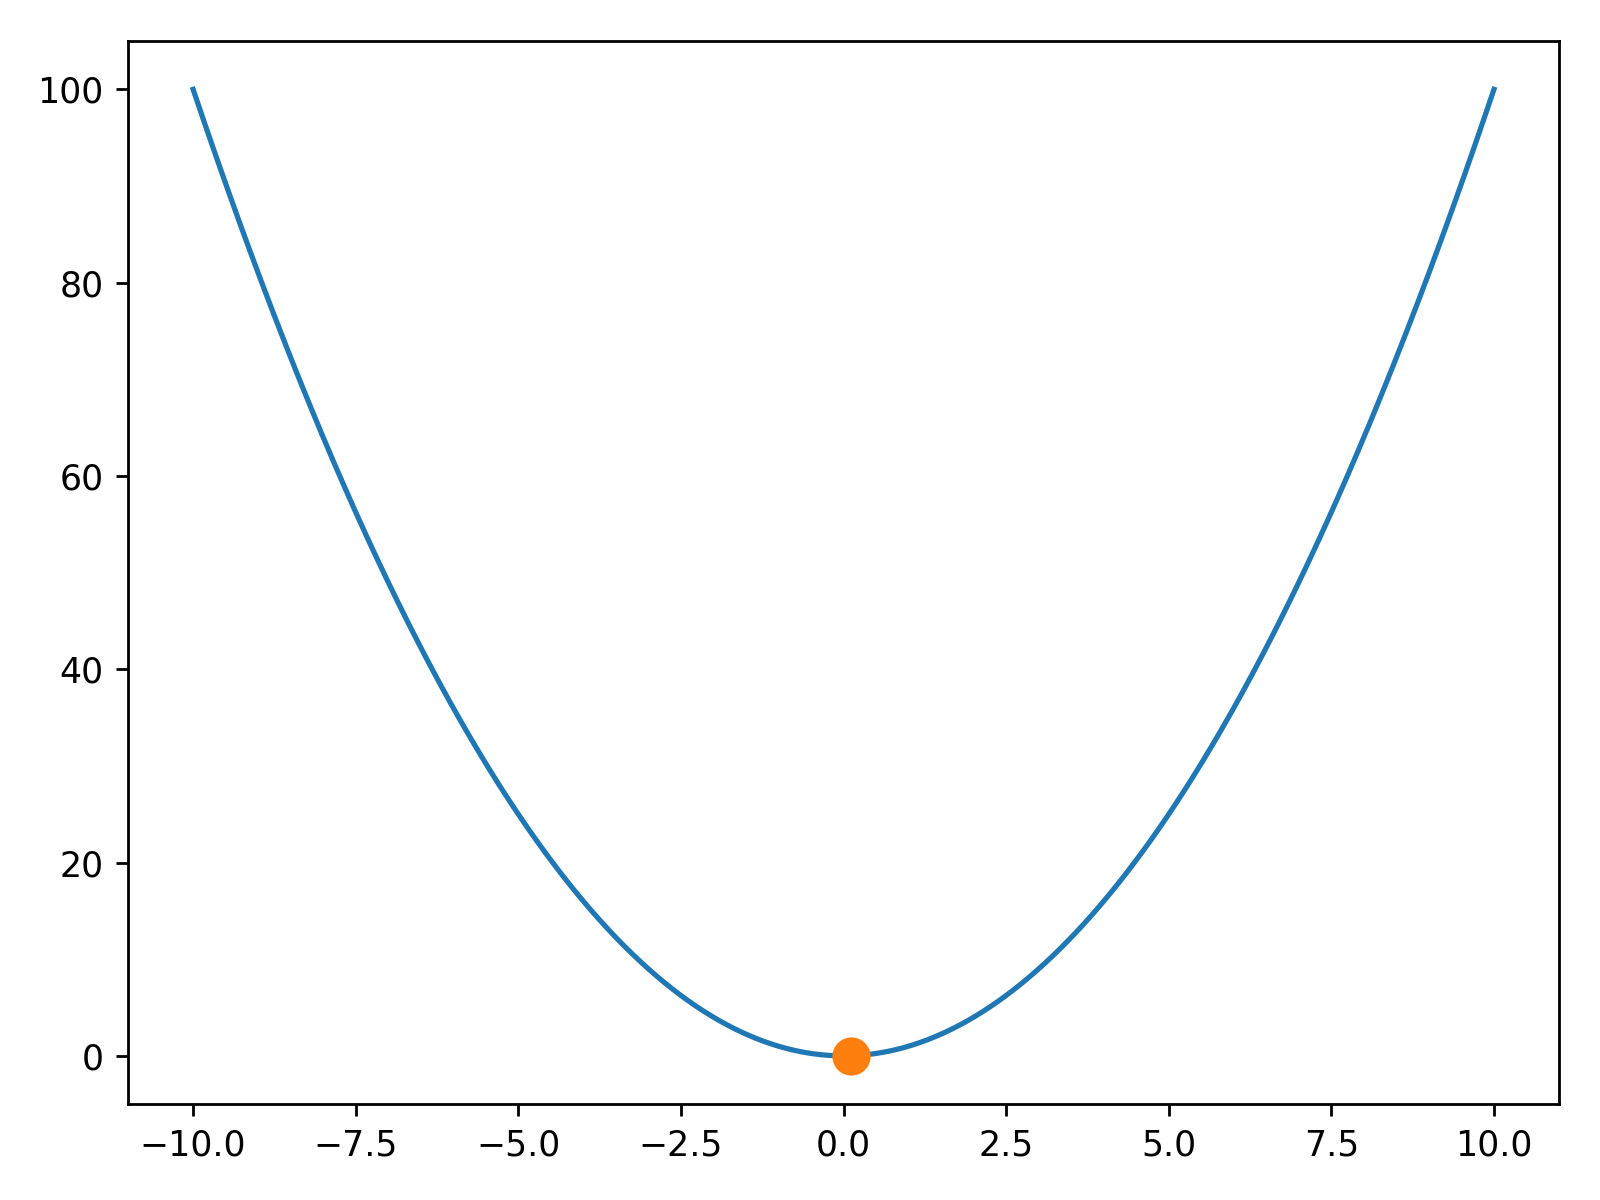

fig size: 100.0 DPI, size in inches [6.4 4.8]


In [8]:
update = momentum_update
learning_rate = 0.1
v = 0
mu = 0.9

init_x = 7

plt.close()
reload(plt)
fig, ax = plt.subplots()
fig.set_tight_layout(True)

func_x = np.linspace(-10, 10, 1000)
func_y = [func(_x) for _x in func_x]

ax.plot(func_x, func_y)

point, = ax.plot(init_x, func(init_x), marker="o", markersize=10)

print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))
anim2 = FuncAnimation(fig, plot_update, frames=range(10000), interval=50, repeat=False)

plt.show()

## Nesterov Momentum

### High momentum
Nesterov Momentum still runs over the minimum, but converges a bit faster than standard momentum

In [ ]:
update = nesterov_momentum_update
learning_rate = 0.1
v = 0
mu = 0.9

init_x = 7

plt.close()
reload(plt)
fig, ax = plt.subplots()
fig.set_tight_layout(True)

func_x = np.linspace(-10, 10, 1000)
func_y = [func(_x) for _x in func_x]

ax.plot(func_x, func_y)

point, = ax.plot(init_x, func(init_x), marker="o", markersize=10)

print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))
anim2 = FuncAnimation(fig, plot_update, frames=range(10000), interval=50, repeat=False)

plt.show()

### Very high learning rate
Here, even Nesterov Momentum does not help. Spoilers: Adam will deal with this just fine!

In [ ]:
update = nesterov_momentum_update
learning_rate = 10
v = 0
mu = 0.9

init_x = 7

plt.close()
reload(plt)
fig, ax = plt.subplots()
fig.set_tight_layout(True)

func_x = np.linspace(-10, 10, 1000)
func_y = [func(_x) for _x in func_x]

ax.plot(func_x, func_y)

point, = ax.plot(init_x, func(init_x), marker="o", markersize=10)

print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))
anim2 = FuncAnimation(fig, plot_update, frames=range(10000), interval=50, repeat=False)

plt.show()

## Adam

### High learning rate
Adam can deal rather well with high learning rates. With this learning rate, SGD or momentum would leave and never come back.

In [ ]:
update = adam_update
learning_rate = 10

beta1 = 0.9
beta2 = 0.999
m, v = 0, 0
t = 1
eps = 1e-8

init_x = 7

plt.close()
reload(plt)
fig, ax = plt.subplots()
fig.set_tight_layout(True)

func_x = np.linspace(-10, 10, 1000)
func_y = [func(_x) for _x in func_x]

ax.plot(func_x, func_y)

point, = ax.plot(init_x, func(init_x), marker="o", markersize=10)

print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))
anim2 = FuncAnimation(fig, plot_update, frames=range(10000), interval=50, repeat=False)

plt.show()

### Low learning rate
With low learning rate, Adam tends to take very long.

In [ ]:
update = adam_update
learning_rate = 0.01

beta1 = 0.9
beta2 = 0.999
m, v = 0, 0
t = 1
eps = 1e-8

init_x = 7

plt.close()
reload(plt)
fig, ax = plt.subplots()
fig.set_tight_layout(True)

func_x = np.linspace(-10, 10, 1000)
func_y = [func(_x) for _x in func_x]

ax.plot(func_x, func_y)

point, = ax.plot(init_x, func(init_x), marker="o", markersize=10)

print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))
anim2 = FuncAnimation(fig, plot_update, frames=range(10000), interval=50, repeat=False)

plt.show()

## RAdam

In [ ]:
update = radam_update
learning_rate = 0.01

beta1 = 0.9
beta2 = 0.999
p = 2 / (1 - beta2) - 1
i = 0
m, v = 0, 0
t = 1
eps = 1e-8

init_x = 7

plt.close()
reload(plt)
fig, ax = plt.subplots()
fig.set_tight_layout(True)

func_x = np.linspace(-10, 10, 1000)
func_y = [func(_x) for _x in func_x]

ax.plot(func_x, func_y)

point, = ax.plot(init_x, func(init_x), marker="o", markersize=10)

print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))
anim2 = FuncAnimation(fig, plot_update, frames=range(10000), interval=50, repeat=False)

plt.show()

## Playground

Feel free to experiment with other settings here!

In [ ]:
# All hyperparameters (remember that not every optimiser uses them)

v = 0
mu = 0.9
learning_rate = 0.1


cache = 0
eps = 1e-8

decay_rate = 0.99

beta1 = 0.9
beta2 = 0.999
m, v = 0, 0
t = 1

i = 0
p = 2 / (1 - beta2) - 1

# Choose your optimiser
update = adam_update

# Choose your initial point
init_x = 7


fig, ax = plt.subplots()
fig.set_tight_layout(True)

func_x = np.linspace(-10, 10, 1000)
func_y = [func(_x) for _x in func_x]

ax.plot(func_x, func_y)

point, = ax.plot(init_x, func(init_x), marker="o", markersize=10)

print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))
anim2 = FuncAnimation(fig, plot_update, frames=range(10000), interval=50, repeat=False)

plt.show()